In [1]:
from keras.preprocessing.image import ImageDataGenerator
import os

## Data pre-processing

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Take the path to a directory and import the images

train_dir = 'E:\\Study\\TRU\\4 Fourth Year\\Fall 2022 - University of Salford\\Deep Learning\\Assessment\\Data\\signlang\\signlang\\train'
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128,128),
                                                    batch_size=10, class_mode='categorical')

val_dir = 'E:\\Study\\TRU\\4 Fourth Year\\Fall 2022 - University of Salford\\Deep Learning\\Assessment\\Data\\signlang\\signlang\\val'
val_generator = test_datagen.flow_from_directory(val_dir, target_size=(128,128),
                                                 batch_size=10, class_mode='categorical')

#  Find the labels of the digits

class_dictionary = train_generator.class_indices
class_dictionary = { value:key for key,value in class_dictionary.items()}
class_list = [value for _,value in class_dictionary.items()]
print(class_list)

Found 1929 images belonging to 10 classes.
Found 548 images belonging to 10 classes.
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


## Define the network

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from keras import models, layers, optimizers
from keras.layers import Dense, Activation, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Model

from keras.applications.inception_v3 import InceptionV3


inception_model = InceptionV3(input_shape=(128,128,3), include_top=False, weights='imagenet')
network = inception_model.output
network = Flatten()(network)
network = Dense(512, activation='relu')(network)
network = Dense(10, activation='softmax')(network)

model = Model(inputs = inception_model.input , outputs = network)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

model.summary()

87910968/87910968 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                             

 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 13, 13, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 13, 13, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 13, 13, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activatio

 activation_22 (Activation)     (None, 13, 13, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 13, 13, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 13, 13, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 13, 13, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 13, 13, 96)  288         ['conv2d_23[0][0]']              
 ormalizat

                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 6, 6, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 6, 6, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 6, 6, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35

 batch_normalization_44 (BatchN  (None, 6, 6, 160)   480         ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 6, 6, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 6, 6, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 6, 6, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 conv2d_55 (Conv2D)             (None, 6, 6, 160)    179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 6, 6, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 6, 6, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 6, 6, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 6, 6, 160)    179200      ['activation_55[0][0]']          
          

 activation_65 (Activation)     (None, 6, 6, 192)    0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 6, 6, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 6, 6, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 6, 6, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 6, 6, 192)   576         ['conv2d_66[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_70 (BatchN  (None, 6, 6, 192)   576         ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 6, 6, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 6, 6, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 6, 6, 192)    0           ['batch_normalization_74[0][0]'] 
          

                                                                                                  
 activation_79 (Activation)     (None, 2, 2, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 2, 2, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 2, 2, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 2, 2, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 batch_normalization_93 (BatchN  (None, 2, 2, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 2, 2, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 2, 2, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 2, 2, 768)    0           ['activation_91[0][0]',          
          

## Initialize earlystopping callback and train the network

In [4]:
from keras import callbacks

# Initialize earlystopping callback
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience=3, 
                                        restore_best_weights=True)

digits_train_model = model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[earlystopping])

Epoch 1/10
193/193 [==============================] - 273s 1s/step - loss: 1.3969 - accuracy: 0.6195 - val_loss: 1.4522 - val_accuracy: 0.6405
Epoch 2/10
193/193 [==============================] - 261s 1s/step - loss: 0.3953 - accuracy: 0.8891 - val_loss: 0.3231 - val_accuracy: 0.8960
Epoch 3/10
193/193 [==============================] - 284s 1s/step - loss: 0.2363 - accuracy: 0.9336 - val_loss: 0.1768 - val_accuracy: 0.9434
Epoch 4/10
193/193 [==============================] - 261s 1s/step - loss: 0.1976 - accuracy: 0.9508 - val_loss: 0.4335 - val_accuracy: 0.8923
Epoch 5/10
193/193 [==============================] - 272s 1s/step - loss: 0.1129 - accuracy: 0.9762 - val_loss: 0.0598 - val_accuracy: 0.9872
Epoch 6/10
193/193 [==============================] - 305s 2s/step - loss: 0.1089 - accuracy: 0.9730 - val_loss: 0.1516 - val_accuracy: 0.9453
Epoch 7/10
193/193 [==============================] - 276s 1s/step - loss: 0.1461 - accuracy: 0.9658 - val_loss: 0.1320 - val_accuracy: 0.9562

## Evaluate performance

In [5]:
scores = model.evaluate(val_generator, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 98.72%


## Learning curves

In [6]:
# Save the history 

import pickle

dictionary_data = digits_train_model.history
history_file = open("model_data_inception.pkl", "wb")
pickle.dump(dictionary_data, history_file)
history_file.close()


In [7]:
# load the history 

import pickle

history_file = open("model_data_inception.pkl", "rb")
history = pickle.load(history_file)
history_file.close()
print(history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [8]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1,len(acc)+1)

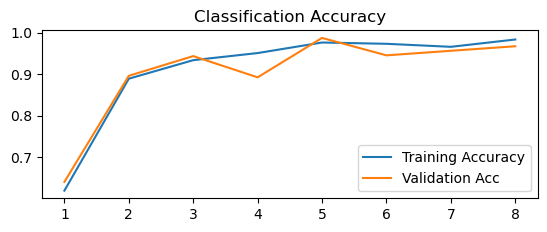

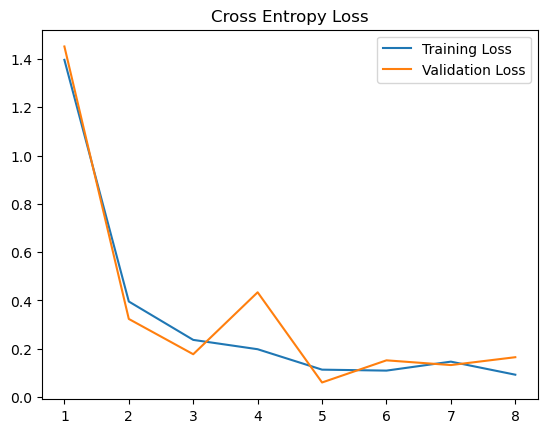

In [9]:
import matplotlib.pyplot as plt

# Plot training accuracy and validation accuracy

plt.subplot(211)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Acc')
plt.title('Classification Accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Cross Entropy Loss')
plt.legend()

plt.show()
